# Lesson5 - On Deep Neural Network Basics

## 1 - Numpy Basics
`numpy` is a handy python module for scientific computing and especially matrix computing.  
Usually we rename module `numpy` as `np`

In [0]:
import numpy as np
from IPython.display import Image

### 1.1 - Fuctions

`np.array(list)` is often used to create numpy array from list.

In [19]:
arr = np.array([1, 2, 3])
print(arr)

[1 2 3]


`np.zeros(arr_shape)` returns a matrix or vector in shape ordered by tuple `arr_shape`.  
**Attention: arr_shape is a tuple**

In [20]:
zero = np.zeros((2, 3))
print(zero)

[[0. 0. 0.]
 [0. 0. 0.]]


`np_matrix.shape` is the numpy matirx's shape in a tuple.

In [21]:
print(zero.shape)


(2, 3)


Pay attention, when you create numpy matrix from a one dimension list, the shape is usually `(m, )`.  
Usually we reshape the matirx to be `(m, 1)` in case causing annoying bugs.
The fuction you'll need is `np_matrix.reshape(dim1, dim2,..., dimn)`

In [22]:
print(arr.shape)
arr = arr.reshape(arr.shape[0], 1)
print(arr.shape)

(3,)
(3, 1)


`np.random.rand(dim1, dim2, ..., dimn)` returns a random initialized matrix shaped as tuple `arr_shape` appointed.

In [23]:
mat_rand = np.random.rand(3, 5)
print(mat_rand)
print(mat_rand.shape)

[[0.47602897 0.88076377 0.01247704 0.3980761  0.98403803]
 [0.63483988 0.37220466 0.53616491 0.76325326 0.94196743]
 [0.39335472 0.23892841 0.94801984 0.03017083 0.9555027 ]]
(3, 5)


`np.sum(matrix, axis=p, keepdims=True/False)` means to add matrix in dimension p, and returns.

In [24]:
rand_sum = np.sum(mat_rand, axis=1, keepdims=True)
print(rand_sum)
print(rand_sum.shape)
rand_sum = np.sum(mat_rand, axis=1, keepdims=False)
print(rand_sum)
print(rand_sum.shape)

[[2.75138391]
 [3.24843014]
 [2.56597651]]
(3, 1)
[2.75138391 3.24843014 2.56597651]
(3,)


`np.dot(m1, m2)` does the matrix multiplication. Tell it apart from elemental multiplication.

In [25]:
A = np.ones((3, 3))
print(A)
I = np.eye(3, 3)
print(I)
print(np.dot(A, I))
print(A * I)

[[1. 1. 1.]
 [1. 1. 1.]
 [1. 1. 1.]]
[[1. 0. 0.]
 [0. 1. 0.]
 [0. 0. 1.]]
[[1. 1. 1.]
 [1. 1. 1.]
 [1. 1. 1.]]
[[1. 0. 0.]
 [0. 1. 0.]
 [0. 0. 1.]]


### 1.2 - Broadcasting

In numpy matrix, there is a concept called **broadcasting**, which allows us to add, multiply and divide matrix with matrix, vector and scalar in different shape.

* matrix op matrix

In [26]:
a = np.random.rand(3, 3)
print(a)
b = np.ones((3, 1))
print(b)
print(a + b)

[[0.3478792  0.69534942 0.13370806]
 [0.04935268 0.88896422 0.07573869]
 [0.79059463 0.44352386 0.10042051]]
[[1.]
 [1.]
 [1.]]
[[1.3478792  1.69534942 1.13370806]
 [1.04935268 1.88896422 1.07573869]
 [1.79059463 1.44352386 1.10042051]]


* matrix op scalar

In [27]:
print(a + 1)

[[1.3478792  1.69534942 1.13370806]
 [1.04935268 1.88896422 1.07573869]
 [1.79059463 1.44352386 1.10042051]]


* matrix op vector

In [28]:
b = np.ones((3, ))
print(a + b)

[[1.3478792  1.69534942 1.13370806]
 [1.04935268 1.88896422 1.07573869]
 [1.79059463 1.44352386 1.10042051]]


## 2 - Logistic Regression  
There is a `binary classification` problem to recognize cat. 

### 2.1 - Data Normalization  
Usually we map the pixel value of image to `(-1, 1)` or `(0, 1)`before training the model.  
It makes gradient descent to converge faster.

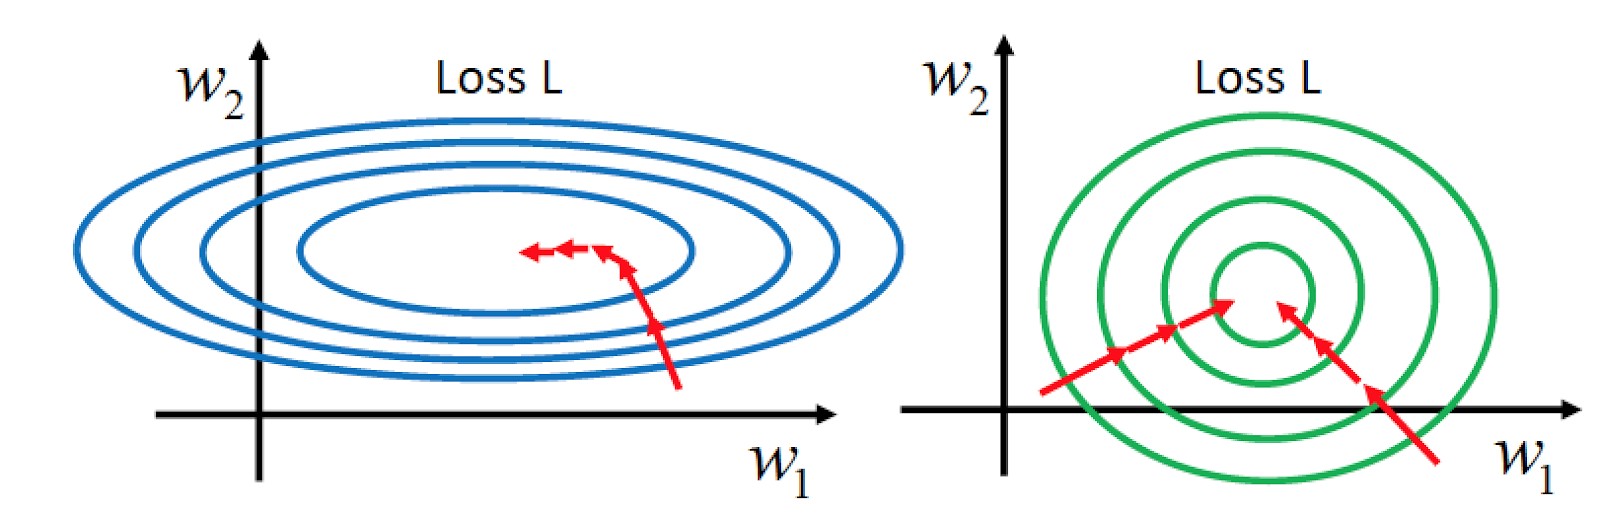

In [29]:
display(Image('./Normalization.png', width=800, height=300))

### 2.2 - Defining Structure

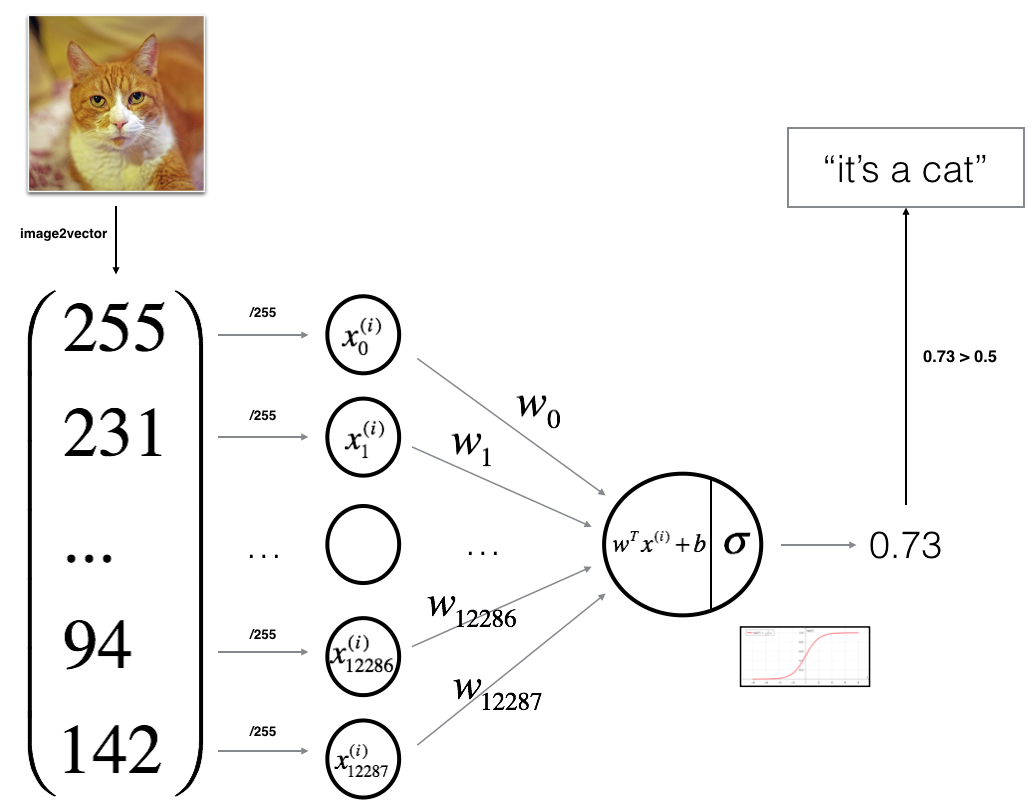

In [30]:


display(Image('./LogReg_kiank.png', width=800, height=600))

### 2.3 - Parameters Initialization . 
Usually we initialize parameters $W$ randomly, and let $b$ to be zero.  
Question: Why don't initialize all parameters to be zero?


### 2.4 - Forward Propagation
The original image is an 64 * 64 RGB, which means the shape is `(64, 64, 3)`.     
$x^{(i)}$ is the $i$th image  shaped as a colomn vector.    
So $x^{(i)}.shape = $   `(12288, 1)`    
The output is the probability of image being a cat.  
We suppose the probability could be calculated by a linear funtion:  
$$z^{(i)} = w_0x^{(i)}_0 + w_1x^{(i)}_1 + ... + w_{12287}x^{(i)}_{12287} + b$$    
But $y^{(i)}$ maybe too large, so we use fuction `sigmoid` to map $y^{(i)}$ to `(0, 1)`    



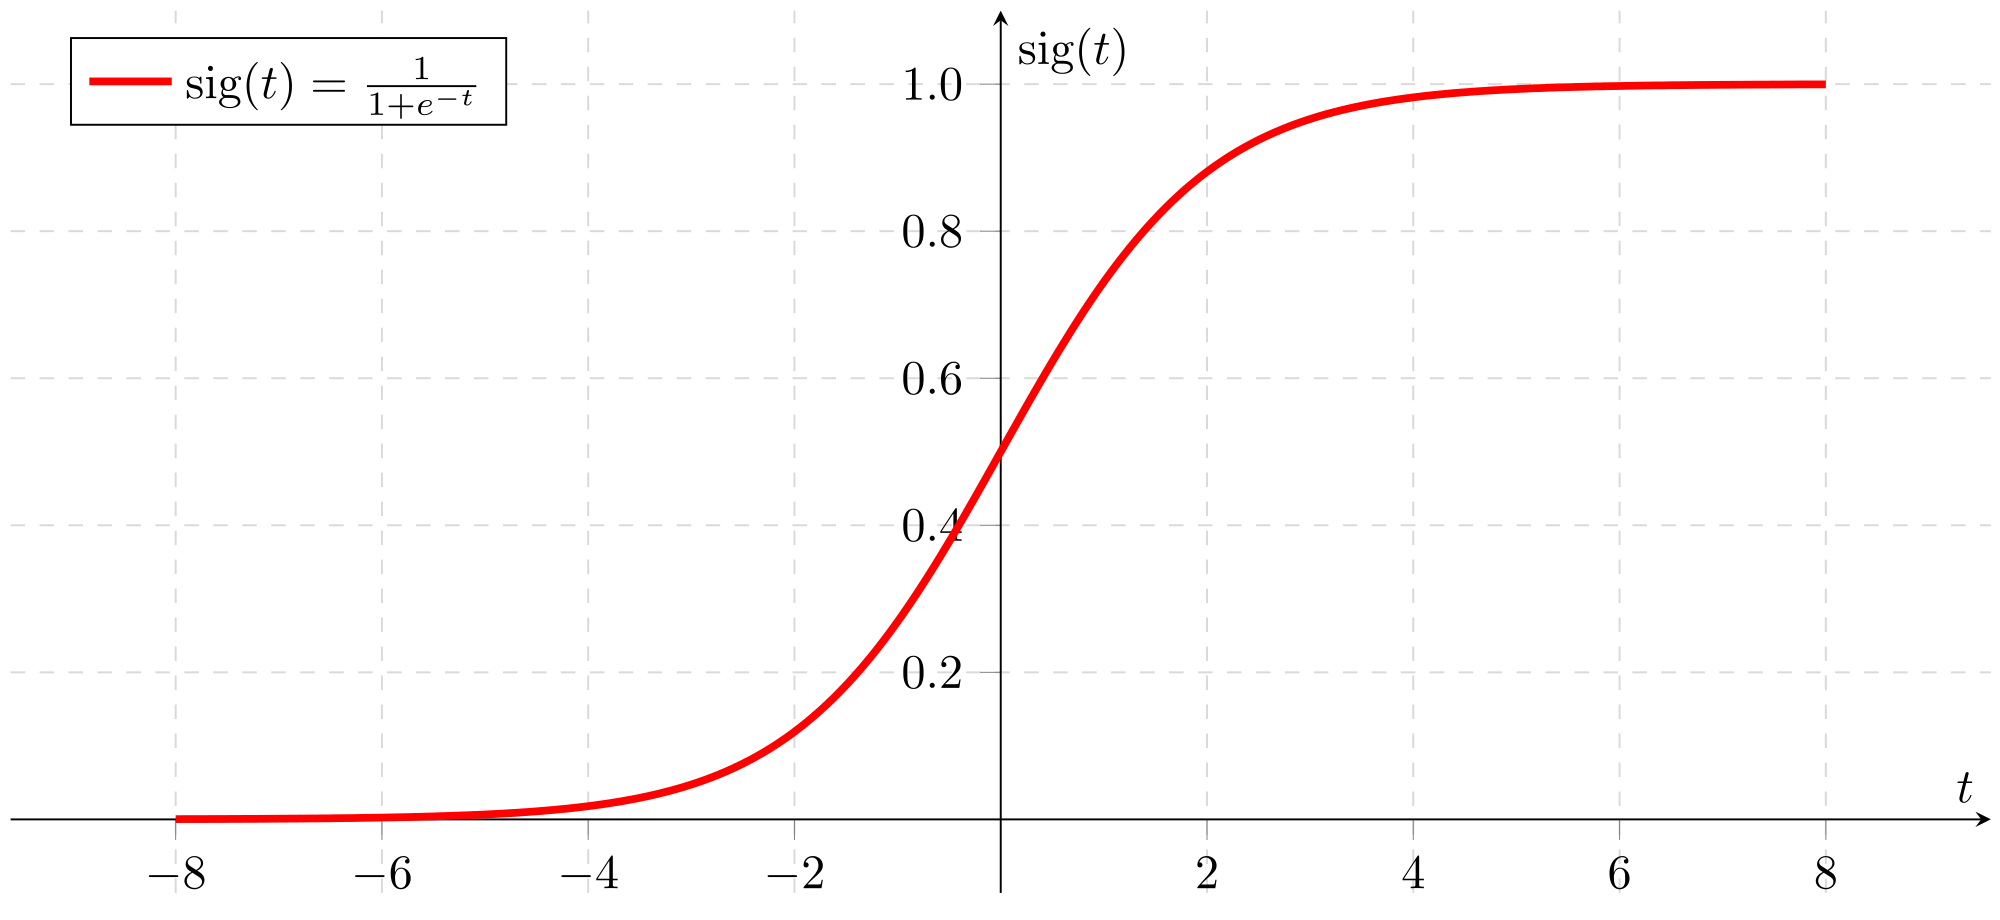

In [31]:

display(Image('./Sigmoid.png', width=600, height=300))


So the predicted probability of image being cat is:
$$\hat y^{(i)} = a^{(i)} = sigmoid(z^{(i)}) = \frac{1}{1 + e^{-z}}$$  
We usually call the output of a neuron **activation**, the reason would be discussed later.

#### 2.4.1 Vectorization
How do we deal with multiple images at the same time?  
It's called vectorization, mainly depends on matrix operations.  
We use $X = (x^{(1)}, x^{(2)}, ..., x^{(m)})$ as input,  
$W = (w_0, w_1, ..., w_m)^T$  
then $Z = (z^{(1)}, z^{(2)}, ..., z^{(m)}) = W^TX + b$  
the output $A = (a^{(1)}, a^{(2)}, ..., a^{(m)})= sigmoid(Z)$  



### 2.5 - Backward Propagation

Now we have the predictions about m images.  
But the result could be horrible.  
Let's define the loss/difference between **predicted result** and **true result**.   

$$\mathcal{L}(a^{(i)}, y^{(i)}) =  - y^{(i)}  \log(a^{(i)}) - (1-y^{(i)} )  \log(1-a^{(i)})$$  
The loss fuction can be defined freely, as long as it makes sense.  
The average loss should be:  
$$J = -\frac{1}{m}\sum_{i=1}^{m}y^{(i)}\log(a^{(i)})+(1-y^{(i)})\log(1-a^{(i)})$$

#### 2.5.1 - Gradient Descent
Now we have $J(w_0, w_1, ..., w_m, b, x_0, x_1, ...,x_m)$,  
the target is to minimize $J$ by changing $w_0, w_1, ..., w_m, b$  
Basically, there are two options:
* Let each partial derivative to be zero, then solve the equations, get the value of $w_0, w_1, ..., w_m, b$  
* Using gradient descent . 
$$w_0 = w_0 - \alpha \frac{\partial J}{\partial w_0} $$
$$w_1 = w_1 - \alpha \frac{\partial J}{\partial w_1} $$  
$$...$$
$$w_m = w_m - \alpha \frac{\partial J}{\partial w_m} $$  
$$ b = b - \alpha \frac{\partial J}{\partial b} $$
  $\alpha$ is a scalar, usually in $(0, 1)$  called **Learning Rate**.  
  It can be proved that for $f = (x_0, x_1, ..., x_n)$ the fastest increasing direction is $(\frac{\partial f}{\partial x_0}, \frac{\partial f}{\partial x_1}, ..., \frac{\partial f}{\partial x_n})$

After gradient descent, wo complete forward / backward propagation once, it's call 1 **iteration**.  
Then we repeat the iteration untill the loss is acceptable, then the neural network training is finished.  
By now the model should have a high accuracy for prediction.



#### 2.5.2 - Choose Your Learning Rate Carefully
The learning rate should neither be too small nor too big.  
If it's too big, you may never converge to minima in gradient descent.    
If it's too small, the process to converge to minima would be extremely long.    

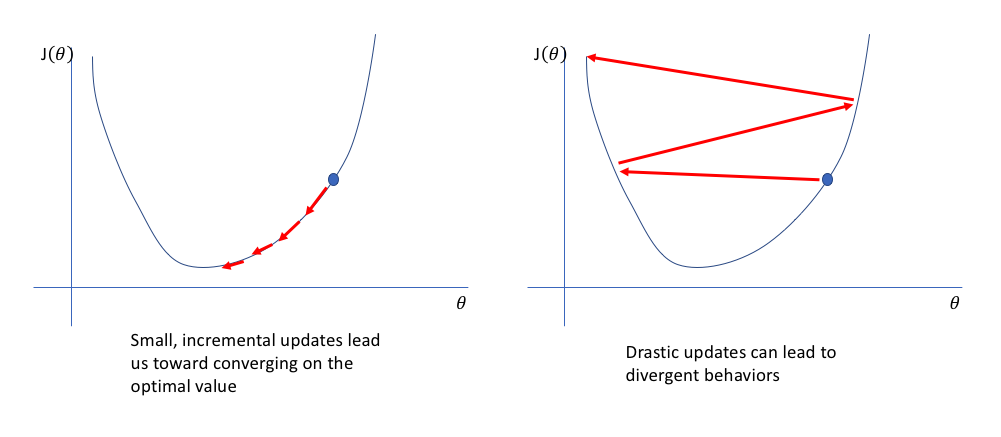

In [32]:
display(Image('./LearningRate.png', width=800, height=300))

## 3 - Build Your Own Logistic Regression Model
- [h5py](http://www.h5py.org) is a common package to interact with a dataset that is stored on an H5 file.
- [matplotlib](http://matplotlib.org) is a famous library to plot graphs in Python.  

The process are as follows:  
1. Data Normalization
2. Defining Model Structure
3. Initializing Parameters
4. Loop:
  - Forward Propagation: Calculate Current Loss
  - Backward Propagation: Calculate Current Gradient
  - Update parameters: Gradient Descent

### 3.1 - Data Washing

In [0]:
import h5py
import matplotlib.pyplot as plt

In [0]:
def load_dataset():
    train_dataset = h5py.File('./train_catvnoncat.h5', "r")
    train_set_x_orig = np.array(train_dataset["train_set_x"][:]) # your train set features
    train_set_y_orig = np.array(train_dataset["train_set_y"][:]) # your train set labels

    test_dataset = h5py.File('./test_catvnoncat.h5', "r")
    test_set_x_orig = np.array(test_dataset["test_set_x"][:]) # your test set features
    test_set_y_orig = np.array(test_dataset["test_set_y"][:]) # your test set labels

    classes = np.array(test_dataset["list_classes"][:]) # the list of classes
    
    train_set_y_orig = train_set_y_orig.reshape((1, train_set_y_orig.shape[0]))
    test_set_y_orig = test_set_y_orig.reshape((1, test_set_y_orig.shape[0]))
    
    return train_set_x_orig, train_set_y_orig, test_set_x_orig, test_set_y_orig, classes

In [0]:
train_set_x_orig, train_set_y, test_set_x_orig, test_set_y, classes = load_dataset()

y = [1], it's a 'cat' picture.


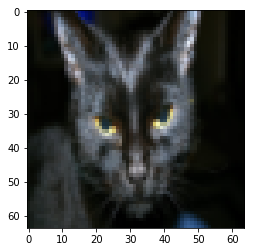

In [36]:
# Example of a picture
index = 25 # Change the index to see different picture
plt.imshow(train_set_x_orig[index])
print ("y = " + str(train_set_y[:, index]) + ", it's a '" + classes[np.squeeze(train_set_y[:, index])].decode("utf-8") +  "' picture.")

In [37]:
m_train = train_set_x_orig.shape[0]
m_test = test_set_x_orig.shape[0]
num_px = train_set_x_orig.shape[1] 


print ("Number of training examples: m_train = " + str(m_train))
print ("Number of testing examples: m_test = " + str(m_test))
print ("Height/Width of each image: num_px = " + str(num_px))
print ("Each image is of size: (" + str(num_px) + ", " + str(num_px) + ", 3)")
print ("train_set_x shape: " + str(train_set_x_orig.shape))
print ("train_set_y shape: " + str(train_set_y.shape))
print ("test_set_x shape: " + str(test_set_x_orig.shape))
print ("test_set_y shape: " + str(test_set_y.shape))

Number of training examples: m_train = 209
Number of testing examples: m_test = 50
Height/Width of each image: num_px = 64
Each image is of size: (64, 64, 3)
train_set_x shape: (209, 64, 64, 3)
train_set_y shape: (1, 209)
test_set_x shape: (50, 64, 64, 3)
test_set_y shape: (1, 50)


In [38]:
# Reshape the training and test examples
train_set_x_flatten = train_set_x_orig.reshape(train_set_x_orig.shape[0], -1).T
test_set_x_flatten = test_set_x_orig.reshape(test_set_x_orig.shape[0], -1).T


print ("train_set_x_flatten shape: " + str(train_set_x_flatten.shape))
print ("train_set_y shape: " + str(train_set_y.shape))
print ("test_set_x_flatten shape: " + str(test_set_x_flatten.shape))
print ("test_set_y shape: " + str(test_set_y.shape))
print ("sanity check after reshaping: " + str(train_set_x_flatten[0:5,0]))

train_set_x_flatten shape: (12288, 209)
train_set_y shape: (1, 209)
test_set_x_flatten shape: (12288, 50)
test_set_y shape: (1, 50)
sanity check after reshaping: [17 31 56 22 33]


### 3.2 - Data Normalization

In [0]:
train_set_x = train_set_x_flatten / 255.
test_set_x = test_set_x_flatten / 255.

### 3.3 - Sigmoid Fuction . 
**Exercise**: Implement `sigmoid()`. As you've seen in the figure above, you need to compute $sigmoid( w^T x + b) = \frac{1}{1 + e^{-(w^T x + b)}}$ to make predictions. Use `np.exp()`.

In [0]:
def sigmoid(z):
    """
    Compute the sigmoid of z

    Arguments:
    z -- A scalar or numpy array of any size.

    Return:
    s -- sigmoid(z)
    """

    ### START CODE HERE ### (≈ 1 line of code)
    s = None
    ### END CODE HERE ###
    
    return s

In [41]:
print ("sigmoid([0, 2]) = " + str(sigmoid(np.array([0,2]))))

sigmoid([0, 2]) = None


**Expected Output**: `[ 0.5      0.88079708]`

### 3.4 - Initializing Parameters
**Exercise:** Implement parameter initialization in the cell below. You have to initialize $w$ as a vector of zeros. If you don't know what numpy function to use, look up `np.zeros()` in the Numpy library's documentation.

In [0]:
def initialize_with_zeros(dim):
    """
    This function creates a vector of zeros of shape (dim, 1) for w and initializes b to 0.
    
    Argument:
    dim -- size of the w vector we want (or number of parameters in this case)
    
    Returns:
    w -- initialized vector of shape (dim, 1)
    b -- initialized scalar (corresponds to the bias)
    """
    
    ### START CODE HERE ### (≈ 2 line of code)
    w = None
    b = None
    ### END CODE HERE ###

    assert(w.shape == (dim, 1))
    assert(isinstance(b, float) or isinstance(b, int))
    
    return w, b

In [43]:
dim = 2
w, b = initialize_with_zeros(dim)
print ("w = " + str(w))
print ("b = " + str(b))

AttributeError: ignored

**Expected Output**:  
`w = [[0.]
 [0.]]`  
 
`b = 0`

### 3.5 - Forward Propagate . 
**Exercise:** Implement a function `propagate()` that computes the cost function and its gradient.

**Hints**:

Forward Propagation:
- You get X
- You compute $A = \sigma(w^T X + b) = (a^{(1)}, a^{(2)}, ..., a^{(m-1)}, a^{(m)})$
- You calculate the cost function: $J = -\frac{1}{m}\sum_{i=1}^{m}y^{(i)}\log(a^{(i)})+(1-y^{(i)})\log(1-a^{(i)})$ 

Here are the two formulas you will be using: 

$$ \frac{\partial J}{\partial w} = \frac{1}{m}X(A-Y)^T$$
$$ \frac{\partial J}{\partial b} = \frac{1}{m} \sum_{i=1}^m (a^{(i)}-y^{(i)})$$  

Try `np.log()` if you need.

In [0]:
def propagate(w, b, X, Y):
    """
    Implement the cost function and its gradient for the propagation explained above

    Arguments:
    w -- weights, a numpy array of size (num_px * num_px * 3, 1)
    b -- bias, a scalar
    X -- data of size (num_px * num_px * 3, number of examples)
    Y -- true "label" vector (containing 0 if non-cat, 1 if cat) of size (1, number of examples)

    Return:
    cost -- negative log-likelihood cost for logistic regression
    dw -- gradient of the loss with respect to w, thus same shape as w
    db -- gradient of the loss with respect to b, thus same shape as b
    
    Tips:
    - Write your code step by step for the propagation. np.log(), np.dot()
    """
    
    m = X.shape[1]
    
    # FORWARD PROPAGATION (FROM X TO COST)
    ### START CODE HERE ### (≈ 2 lines of code)
    A = None                                 # compute activation
    cost = None                              # compute cost
    ### END CODE HERE ###
    
    # BACKWARD PROPAGATION (TO FIND GRAD)
    ### START CODE HERE ### (≈ 2 lines of code)
    dw = None
    db = None
    ### END CODE HERE ###

    assert(dw.shape == w.shape)
    assert(db.dtype == float)
    cost = np.squeeze(cost)
    assert(cost.shape == ())
    
    grads = {"dw": dw,
             "db": db}
    
    return grads, cost

In [0]:
w, b, X, Y = np.array([[1.],[2.]]), 2., np.array([[1.,2.,-1.],[3.,4.,-3.2]]), np.array([[1,0,1]])
grads, cost = propagate(w, b, X, Y)
print ("dw = " + str(grads["dw"]))
print ("db = " + str(grads["db"]))
print ("cost = " + str(cost))

**Expected Output**:    
`dw = [[ 0.99845601]
 [ 2.39507239]]`  
`db = 0.00145557813678`  
`cost = 5.801545319394553`

### 3.6 - Optimization
- You have initialized your parameters.
- You are also able to compute a cost function and its gradient.
- Now, you want to update the parameters using gradient descent.

**Exercise:** Write down the optimization function. The goal is to learn $w$ and $b$ by minimizing the cost function $J$. For a parameter $\theta$, the update rule is $ \theta = \theta - \alpha \text{ } d\theta$, where $\alpha$ is the learning rate.

In [0]:
def optimize(w, b, X, Y, num_iterations, learning_rate, print_cost = False):
    """
    This function optimizes w and b by running a gradient descent algorithm
    
    Arguments:
    w -- weights, a numpy array of size (num_px * num_px * 3, 1)
    b -- bias, a scalar
    X -- data of shape (num_px * num_px * 3, number of examples)
    Y -- true "label" vector (containing 0 if non-cat, 1 if cat), of shape (1, number of examples)
    num_iterations -- number of iterations of the optimization loop
    learning_rate -- learning rate of the gradient descent update rule
    print_cost -- True to print the loss every 100 steps
    
    Returns:
    params -- dictionary containing the weights w and bias b
    grads -- dictionary containing the gradients of the weights and bias with respect to the cost function
    costs -- list of all the costs computed during the optimization, this will be used to plot the learning curve.
    
    Tips:
    You basically need to write down two steps and iterate through them:
        1) Calculate the cost and the gradient for the current parameters. Use propagate().
        2) Update the parameters using gradient descent rule for w and b.
    """
    
    costs = []
    
    for i in range(num_iterations):
        
        
        # Cost and gradient calculation (≈ 1-4 lines of code)
        ### START CODE HERE ### 
        grads, cost = None
        ### END CODE HERE ###
        
        # Retrieve derivatives from grads
        dw = grads["dw"]
        db = grads["db"]
        
        # update rule (≈ 2 lines of code)
        ### START CODE HERE ###
        w = None
        b = None
        ### END CODE HERE ###
        
        # Record the costs
        if i % 100 == 0:
            costs.append(cost)
        
        # Print the cost every 100 training iterations
        if print_cost and i % 100 == 0:
            print ("Cost after iteration %i: %f" %(i, cost))
    
    params = {"w": w,
              "b": b}
    
    grads = {"dw": dw,
             "db": db}
    
    return params, grads, costs

In [0]:
params, grads, costs = optimize(w, b, X, Y, num_iterations= 100, learning_rate = 0.009, print_cost = False)

print ("w = " + str(params["w"]))
print ("b = " + str(params["b"]))
print ("dw = " + str(grads["dw"]))
print ("db = " + str(grads["db"]))

**Expected Output**:    
`w = [[ 0.19033591]
 [ 0.12259159]]`  
`b = 1.92535983008`  
`dw = [[ 0.67752042]
 [ 1.41625495]]`  
`db = 0.219194504541` . 

**Exercise:** The previous function will output the learned w and b. We are able to use w and b to predict the labels for a dataset X. Implement the `predict()` function. There are two steps to computing predictions:

1. Calculate $\hat{Y} = A = \sigma(w^T X + b)$

2. Convert the entries of a into 0 (if activation <= 0.5) or 1 (if activation > 0.5), stores the predictions in a vector `Y_prediction`. If you wish, you can use an `if`/`else` statement in a `for` loop (though there is also a way to vectorize this). 

In [0]:
def predict(w, b, X):
    '''
    Predict whether the label is 0 or 1 using learned logistic regression parameters (w, b)
    
    Arguments:
    w -- weights, a numpy array of size (num_px * num_px * 3, 1)
    b -- bias, a scalar
    X -- data of size (num_px * num_px * 3, number of examples)
    
    Returns:
    Y_prediction -- a numpy array (vector) containing all predictions (0/1) for the examples in X
    '''
    
    m = X.shape[1]
    Y_prediction = np.zeros((1,m))
    w = w.reshape(X.shape[0], 1)
    
    # Compute vector "A" predicting the probabilities of a cat being present in the picture
    ### START CODE HERE ### (≈ 1 line of code)
    A = sigmoid(np.dot(w.T, X) + b)
    ### END CODE HERE ###

    for i in range(A.shape[1]):
        
        # Convert probabilities A[0,i] to actual predictions p[0,i]
        ### START CODE HERE ### (≈ 4 lines of code)
        None
            
        ### END CODE HERE ###
    
    assert(Y_prediction.shape == (1, m))
    
    return Y_prediction

In [0]:
w = np.array([[0.1124579],[0.23106775]])
b = -0.3
X = np.array([[1.,-1.1,-3.2],[1.2,2.,0.1]])
print ("predictions = " + str(predict(w, b, X)))

**Expected Output**:  
`predictions = [[ 1.  1.  0.]]`

## 4 - Merge All Functions into a Model ##

You will now see how the overall model is structured by putting together all the building blocks (functions implemented in the previous parts) together, in the right order.

**Exercise:** Implement the model function. Use the following notation:
    - Y_prediction_test for your predictions on the test set
    - Y_prediction_train for your predictions on the train set
    - w, costs, grads for the outputs of optimize()

In [0]:
def model(X_train, Y_train, X_test, Y_test, num_iterations = 2000, learning_rate = 0.5, print_cost = False):
    """
    Builds the logistic regression model by calling the function you've implemented previously
    
    Arguments:
    X_train -- training set represented by a numpy array of shape (num_px * num_px * 3, m_train)
    Y_train -- training labels represented by a numpy array (vector) of shape (1, m_train)
    X_test -- test set represented by a numpy array of shape (num_px * num_px * 3, m_test)
    Y_test -- test labels represented by a numpy array (vector) of shape (1, m_test)
    num_iterations -- hyperparameter representing the number of iterations to optimize the parameters
    learning_rate -- hyperparameter representing the learning rate used in the update rule of optimize()
    print_cost -- Set to true to print the cost every 100 iterations
    
    Returns:
    d -- dictionary containing information about the model.
    """
    
    ### START CODE HERE ###
    
    # initialize parameters with zeros (≈ 1 line of code)
    w, b = None

    # Gradient descent (≈ 1 line of code)
    # optimize(w, b, X, Y, num_iterations, learning_rate, print_cost = False)
    parameters, grads, costs = None
    
    # Retrieve parameters w and b from dictionary "parameters"
    w = parameters["w"]
    b = parameters["b"]
    
    # Predict test/train set examples (≈ 2 lines of code)
    Y_prediction_test = None
    Y_prediction_train = None

    ### END CODE HERE ###

    # Print train/test Errors
    print("train accuracy: {} %".format(100 - np.mean(np.abs(Y_prediction_train - Y_train)) * 100))
    print("test accuracy: {} %".format(100 - np.mean(np.abs(Y_prediction_test - Y_test)) * 100))

    
    d = {"costs": costs,
         "Y_prediction_test": Y_prediction_test, 
         "Y_prediction_train" : Y_prediction_train, 
         "w" : w, 
         "b" : b,
         "learning_rate" : learning_rate,
         "num_iterations": num_iterations}
    
    return d

In [0]:
d = model(train_set_x, train_set_y, test_set_x, test_set_y, num_iterations = 2000, learning_rate = 0.005, print_cost = True)

In [0]:
# Plot learning curve (with costs)
costs = np.squeeze(d['costs'])
plt.plot(costs)
plt.ylabel('cost')
plt.xlabel('iterations (per hundreds)')
plt.title("Learning rate =" + str(d["learning_rate"]))
plt.show()

### 4.1 - Choice of Learning Rate


In [0]:
learning_rates = [0.01, 0.001, 0.0001]
models = {}
for i in learning_rates:
    print ("learning rate is: " + str(i))
    models[str(i)] = model(train_set_x, train_set_y, test_set_x, test_set_y, num_iterations = 1500, learning_rate = i, print_cost = False)
    print ('\n' + "-------------------------------------------------------" + '\n')

for i in learning_rates:
    plt.plot(np.squeeze(models[str(i)]["costs"]), label= str(models[str(i)]["learning_rate"]))

plt.ylabel('cost')
plt.xlabel('iterations (hundreds)')

legend = plt.legend(loc='upper center', shadow=True)
frame = legend.get_frame()
frame.set_facecolor('0.90')
plt.show()

### 4.2 - Test with your own image

In [0]:

my_image = "my_image.jpg"   # change this to the name of your image file 


# We preprocess the image to fit your algorithm.
fname = my_image
image = np.array(ndimage.imread(fname, flatten=False))
my_image = scipy.misc.imresize(image, size=(num_px,num_px)).reshape((1, num_px*num_px*3)).T
my_predicted_image = predict(d["w"], d["b"], my_image)

plt.imshow(image)
print("y = " + str(np.squeeze(my_predicted_image)) + ", your algorithm predicts a \"" + classes[int(np.squeeze(my_predicted_image)),].decode("utf-8") +  "\" picture.")